## Data Insights & Wrangling

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
suicide_data_path = "Suicide_Data_AL/master.csv"
continent_path = "Suicide_Data_AL/continents.csv"

In [3]:
# Read the Suicide and Continent data
suicide_data = pd.read_csv(suicide_data_path)
continent_data = pd.read_csv(continent_path)
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year_usd,gdp_per_capita_usd,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
continent_data.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [5]:
# Combine the suicide & continent data into a single dataset
combined_data = pd.merge(suicide_data, continent_data, on='country')
combined_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year_usd,gdp_per_capita_usd,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [6]:
# Checking the existence of null values in the DataFrame.
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27448 entries, 0 to 27447
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27448 non-null  object 
 1   year                27448 non-null  int64  
 2   sex                 27448 non-null  object 
 3   age                 27448 non-null  object 
 4   suicides_no         27448 non-null  int64  
 5   population          27448 non-null  int64  
 6   suicides/100k pop   27448 non-null  float64
 7   country-year        27448 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year_usd   27448 non-null  object 
 10  gdp_per_capita_usd  27448 non-null  int64  
 11  generation          27448 non-null  object 
 12  continent           27448 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.9+ MB


In [7]:
# Create a clean DataFrame by dropping unwanted columns
combined_data.drop(['HDI for year','generation'],axis=1, inplace=True)
combined_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year_usd,gdp_per_capita_usd,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Europe


In [8]:
combined_data["year"].value_counts()

2009    1056
2001    1044
2010    1044
2007    1020
2011    1020
2002    1020
2003    1020
2000    1020
2006    1008
2008    1008
2005     996
2004     996
1999     984
2012     960
2013     948
1998     936
2014     924
1995     924
1996     912
1997     912
1994     804
1992     768
1993     768
1990     756
1991     756
2015     732
1987     636
1989     612
1988     576
1986     564
1985     564
2016     160
Name: year, dtype: int64

In [9]:
#Slice data from 2000 till 2010
suicide_data_2000s = combined_data[combined_data["year"].isin(range(2000,2011))]
suicide_data_2000s

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year_usd,gdp_per_capita_usd,continent
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,"3,632,043,908",1299,Europe
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,"3,632,043,908",1299,Europe
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,"3,632,043,908",1299,Europe
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,"3,632,043,908",1299,Europe
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,"3,632,043,908",1299,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27395,Uzbekistan,2010,female,35-54 years,101,3339076,3.02,Uzbekistan2010,"39,332,770,929",1533,Asia
27396,Uzbekistan,2010,male,5-14 years,48,2751752,1.74,Uzbekistan2010,"39,332,770,929",1533,Asia
27397,Uzbekistan,2010,female,75+ years,5,322899,1.55,Uzbekistan2010,"39,332,770,929",1533,Asia
27398,Uzbekistan,2010,female,55-74 years,16,1161422,1.38,Uzbekistan2010,"39,332,770,929",1533,Asia


In [10]:
suicide_data_2000s.to_csv("output_data_AL/suicide_data_2000s.csv")

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation
#and SEM of Suicide no for each country
suicide_data_2000s_by_country = suicide_data_2000s.groupby('country')
suicide_data_2000s_by_country.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year_usd,gdp_per_capita_usd,continent
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,"3,632,043,908",1299,Europe
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,"3,632,043,908",1299,Europe
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,"3,632,043,908",1299,Europe
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,"3,632,043,908",1299,Europe
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,"3,632,043,908",1299,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27304,Uzbekistan,2000,male,35-54 years,528,2289656,23.06,Uzbekistan2000,"13,760,374,488",632,Asia
27305,Uzbekistan,2000,male,25-34 years,355,1843476,19.26,Uzbekistan2000,"13,760,374,488",632,Asia
27306,Uzbekistan,2000,male,55-74 years,153,802122,19.07,Uzbekistan2000,"13,760,374,488",632,Asia
27307,Uzbekistan,2000,male,15-24 years,350,2492264,14.04,Uzbekistan2000,"13,760,374,488",632,Asia


In [12]:
# suicides_no_mean
suicides_no_mean = suicide_data_2000s_by_country['suicides_no'].mean()
# suicides_no_median
suicides_no_median = suicide_data_2000s_by_country['suicides_no'].median()
# suicides_no_variance
suicides_no_variance = suicide_data_2000s_by_country['suicides_no'].var()
# suicides_no_std
suicides_no_std = suicide_data_2000s_by_country['suicides_no'].std()
# suicides_no_sem
suicides_no_sem = suicide_data_2000s_by_country['suicides_no'].sem()

# include statistical analysis series in a df
suicides_no_stats = pd.concat([suicides_no_mean, suicides_no_median, suicides_no_variance, suicides_no_std, suicides_no_sem], axis=1)
suicides_no_stats.columns = ['suicides_no_mean','suicides_no_median','suicides_no_variance','suicides_no_std','suicides_no_sem']
suicides_no_stats

,suicides_no_mean,suicides_no_median,suicides_no_variance,suicides_no_std,suicides_no_sem
country,,,,,
Albania,7.242424,4.0,7.574231e+01,8.703006,0.757499
Antigua and Barbuda,0.066667,0.0,7.955182e-02,0.282049,0.025747
Argentina,253.606061,168.5,4.651398e+04,215.671002,18.771751
Armenia,5.481481,3.0,3.395292e+01,5.826914,0.560695
Aruba,0.568182,0.0,1.041117e+00,1.020352,0.088810
...,...,...,...,...,...
United Arab Emirates,8.638889,3.0,1.740368e+02,13.192300,1.554727
United Kingdom,344.363636,221.5,1.429073e+05,378.030842,32.903361
United States,2782.643939,2282.5,8.516644e+06,2918.328966,254.007933


In [13]:
suicides_no_stats.to_csv("output_data_AL/suicides_no_stats.csv")

### Data Plotting

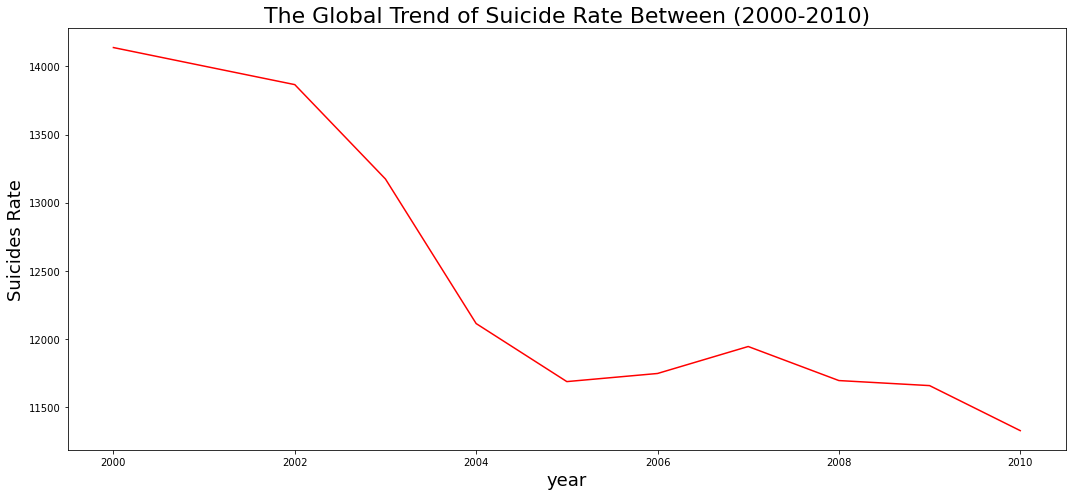

In [14]:
# bar plot showing the global trend of the suicide no per year

suicide_global_trend_year = suicide_data_2000s.groupby('year')['suicides/100k pop'].sum()
suicide_global_trend_year.plot(kind='line', figsize=(15,7),color="r")
plt.title('The Global Trend of Suicide Rate Between (2000-2010)', fontsize=22)
plt.xlabel("year", fontsize=18)
plt.ylabel("Suicides Rate", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/suicide_global_trend.pdf')
plt.show()

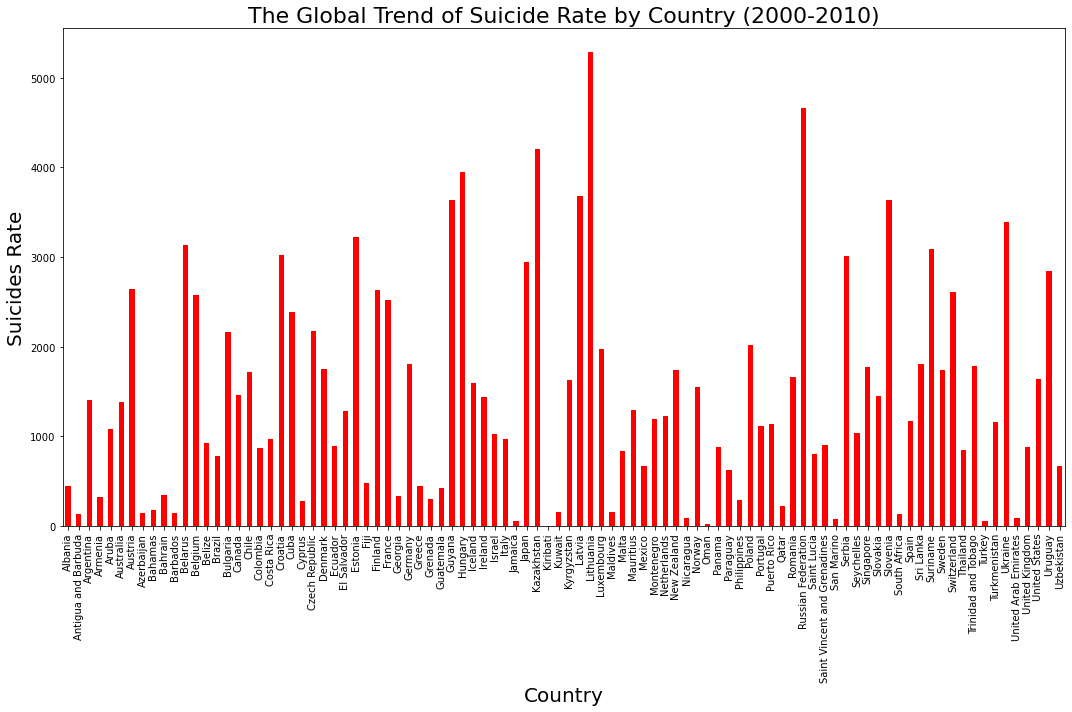

In [15]:
# bar plot showing the global trend of the suicide rate per country 

suicide_global_trend_country = suicide_data_2000s_by_country['suicides/100k pop'].sum()
suicide_global_trend_country.plot(kind='bar', figsize=(15,10),color="r")
#suicides_no_stats['suicides_no_mean']
plt.title('The Global Trend of Suicide Rate by Country (2000-2010)', fontsize=22)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Suicides Rate", fontsize=20)
plt.tight_layout()
plt.savefig('output_data_AL/suicide_global_trend_by_country.pdf')
plt.show()

In [16]:
# Top 5 countries with highest suicide no 
suicide_no_per_country = suicide_data_2000s.groupby('country')['suicides/100k pop'].agg('sum').sort_values(ascending=False).head(5)
suicide_no_per_country

country
Lithuania             5285.80
Russian Federation    4661.64
Kazakhstan            4205.98
Hungary               3953.50
Latvia                3682.00
Name: suicides/100k pop, dtype: float64

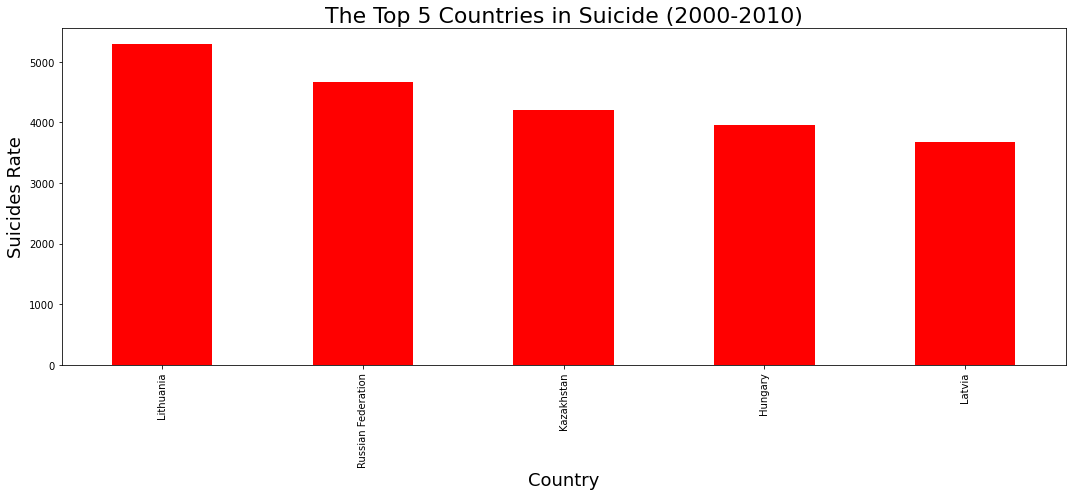

In [17]:
suicide_no_per_country.plot(kind='bar', figsize=(15,7),color="r")                                                                 
plt.title('The Top 5 Countries in Suicide (2000-2010)', fontsize=22)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Suicides Rate", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/top_5_countries.pdf')
plt.show()

In [18]:
# suicide no per continent 
suicide_no_per_continent = suicide_data_2000s.groupby('continent')['suicides/100k pop'].agg('sum')
suicide_no_per_continent

continent
Africa            2462.05
Asia             22072.85
Europe           76104.46
North America    16166.48
Oceania           3601.08
South America    16937.83
Name: suicides/100k pop, dtype: float64

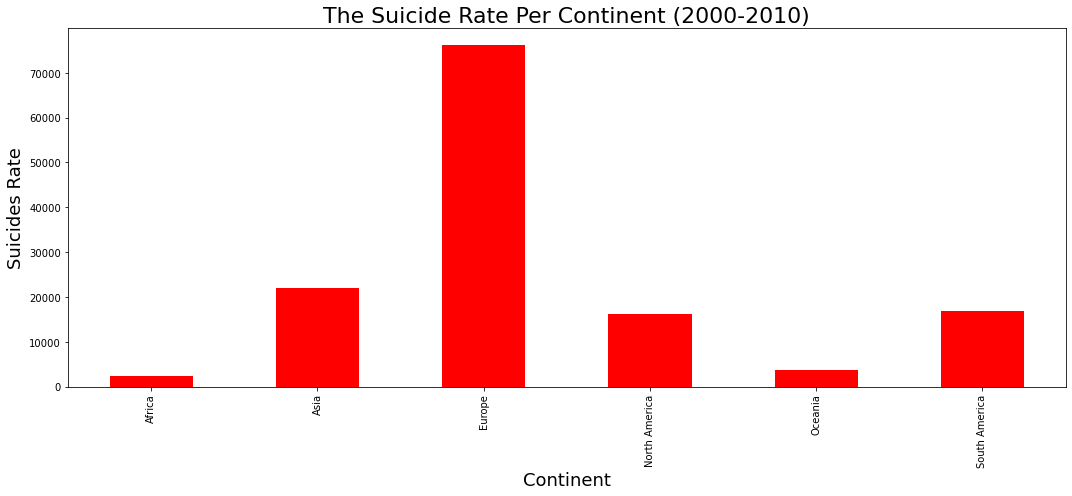

In [19]:
suicide_no_per_continent.plot(kind='bar', figsize=(15,7),color="r")                                                                 
plt.title('The Suicide Rate Per Continent (2000-2010)', fontsize=22)
plt.xlabel("Continent", fontsize=18)
plt.ylabel("Suicides Rate", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/suicide_per_continent.pdf')
plt.show()

In [20]:
# bar plot showing relationt between the age group and suicide no
suicide_age_grp = suicide_data_2000s.groupby('age')['suicides/100k pop'].agg('sum')
suicide_age_grp

age
15-24 years    16169.16
25-34 years    22355.06
35-54 years    27744.31
5-14 years      1155.39
55-74 years    28986.34
75+ years      40934.49
Name: suicides/100k pop, dtype: float64

In [21]:
# What is the relationship between age groups on suicide rates?

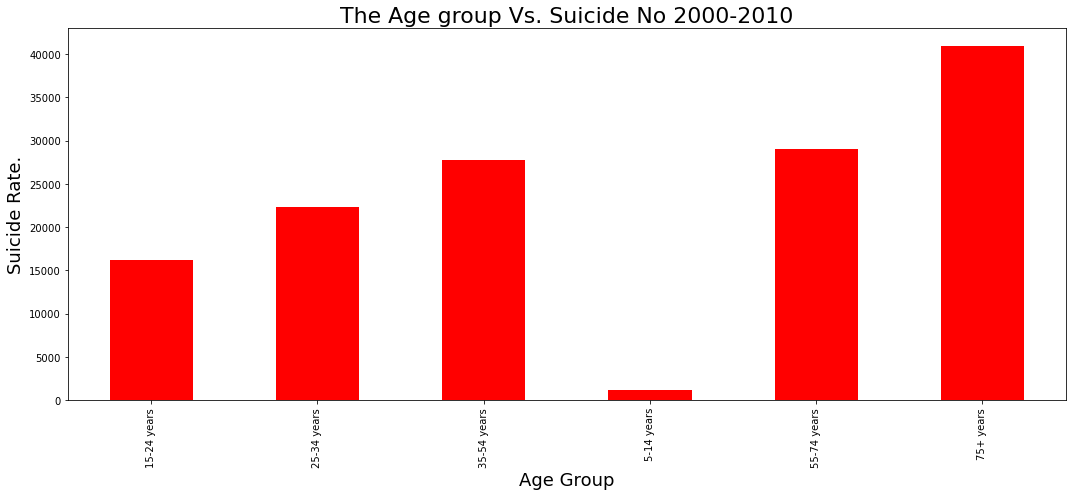

In [22]:
suicide_vs_age = suicide_age_grp.plot(kind='bar', figsize=(15,7), color="r")
plt.title('The Age group Vs. Suicide No 2000-2010', fontsize=22)
plt.xlabel("Age Group", fontsize=18)
plt.ylabel("Suicide Rate.", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/Age_vs_suicide.pdf')
plt.show()

In [23]:
#  Are men or women more likely to commit suicide?

In [24]:
# Generate pie plot showing the distribution of female versus male suicide percent
suicide_gender = suicide_data_2000s.groupby("sex")

gender_suicide_percent = 100*suicide_gender['suicides_no'].sum()/suicide_data_2000s['suicides_no'].sum()
gender_suicide_percent

sex
female    21.61538
male      78.38462
Name: suicides_no, dtype: float64

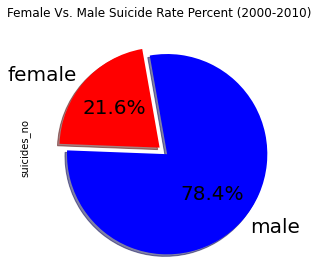

In [25]:
# Pie Plot
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='sex', title="Female Vs. Male Suicide Rate Percent (2000-2010)",\
                startangle=100, autopct='%1.1f%%',shadow=True, fontsize=20, colors =["r","b"],legend =False, explode =(0, 0.1))
plt.tight_layout()
plt.savefig('output_data_AL/gender_suicide_percent.pdf')
plt.show()

The male has a very high suicde rate compared to the female

## Correlation

In [26]:
# what is the impact of economical status on the suicide rate?
gdp_per_capita = suicide_data_2000s.groupby('country').agg({'suicides/100k pop':'sum','gdp_per_capita_usd':'mean'})
gdp_per_capita

,suicides/100k pop,gdp_per_capita_usd
country,,
Albania,446.38,2939.545455
Antigua and Barbuda,131.28,12751.200000
Argentina,1403.14,7055.727273
Armenia,327.53,2112.555556
Aruba,1079.12,24823.727273
...,...,...
United Arab Emirates,94.89,42162.000000
United Kingdom,886.42,40639.636364
United States,1644.61,46433.636364


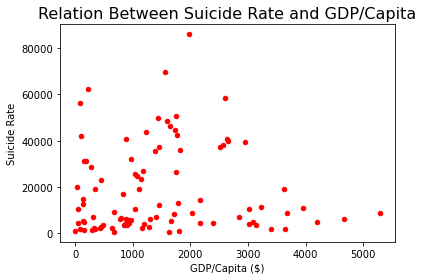

In [27]:
gdp_per_capita.plot(kind='scatter', x='suicides/100k pop', y='gdp_per_capita_usd', color='r')
plt.title('Relation Between Suicide Rate and GDP/Capita', fontsize=16)
plt.xlabel("GDP/Capita ($)", fontsize=10)
plt.ylabel("Suicide Rate", fontsize=10)
plt.savefig('output_data_AL/corr_GDP_vs_suicide.pdf')
plt.show()

In [28]:
suicides_no = gdp_per_capita.iloc[:,0]
gdp_per_capita = gdp_per_capita.iloc[:,1]
correlation = st.pearsonr(suicides_no,gdp_per_capita)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

The correlation coefficient between both factors is 0.02


very weak correlation between the GDP and the Suicide rate 

In [29]:
#linear regression analysis between Suicide Rate and GDP/Capita

The r-squared is: 0.01056389912446096
y = 0.0x + 1345.34


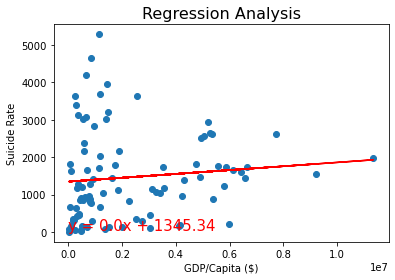

In [30]:
gdp_per_capita_linear = suicide_data_2000s.groupby("country").sum()
gdp_per_capita_linear = gdp_per_capita_linear.reset_index()

x_values = gdp_per_capita_linear['gdp_per_capita_usd']
y_values = gdp_per_capita_linear['suicides/100k pop']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Regression Analysis', fontsize=16)
plt.xlabel('GDP/Capita ($)')
plt.ylabel('Suicide Rate')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig('output_data_AL/reg_GDP_vs_suicide.pdf')
plt.show()

the R-squared value (1 %) indicates that none of  the variability around its mean